In [1]:
%matplotlib notebook

In [2]:
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [17]:
""" 
Plot the Reaction rates in m^3 s^-1 as a function of
 E, the energy in keV of the incident particle 
 [the first ion of the reaction label]

 Data taken from NRL Formulary 2013.
"""
E, DD, DT, DH = loadtxt('reaction_rates_vs_energy_incident_particle.txt', 
                   skiprows=1, unpack=True)

<IPython.core.display.Javascript object>


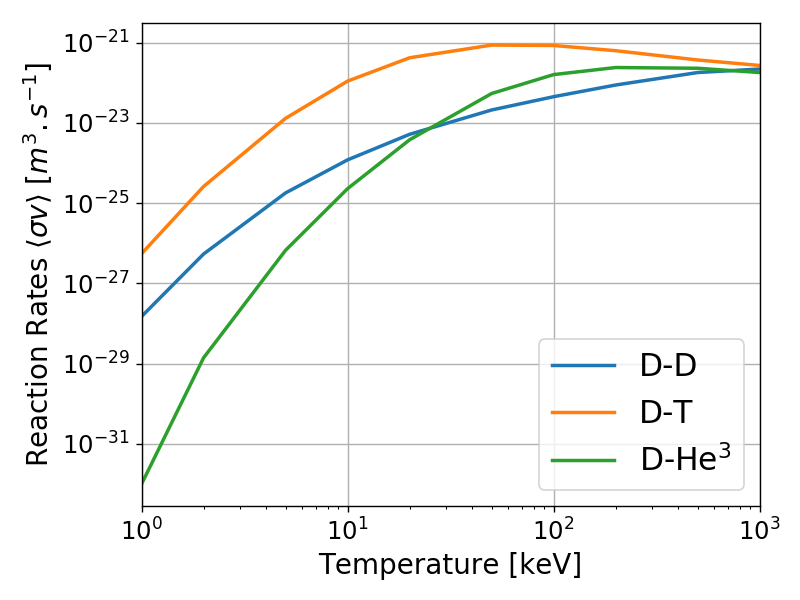

In [24]:
cm3_2_m3 = 1e-6

figure(num=1)
loglog(E, cm3_2_m3*DD, E, cm3_2_m3*DT, E, cm3_2_m3*DH, lw=2)
grid(True)
xlabel('Temperature [keV]', fontsize=16)
ylabel(r'Reaction Rates $\left<\sigma v\right>$ [$m^3.s^{-1}$]', fontsize=16)
xticks(fontsize=14)
yticks(fontsize=14)
xlim(min(E), max(E))
legend(('D-D', 'D-T', 'D-He$^3$'), loc='best', fontsize=18)
tight_layout()
savefig('Fusion_Reactivity.png', dpi=150)

Plot the total cross section in m^2 for various species vs incident energy in keV

In [25]:
def cross_section(E, A):
    """
    The total cross section in barns (1 barns=1e-24 cm^2) as a function of E, 
    the energy in keV of the incident particle.
    
    Formula from NRL Formulary 2013.
    """
    sigma_T = (A[4]+((A[3]-A[2]*E)**2+1)**(-1) * A[1])/(E*(exp(A[0]/sqrt(E))-1))
    return(sigma_T)
    

In [26]:
A_DD_a = [46.097, 372, 4.36e-4, 1.220, 0]
A_DD_b = [47.88, 482, 3.08e-4, 1.177, 0]
A_DT   = [45.95, 50200, 1.368e-2, 1.076, 409]
A_DHe3 = [89.27, 25900, 3.98e-3, 1.297, 647]
A_TT   = [38.39, 448, 1.02e-3, 2.09, 0]
A_THe3 = [123.1, 11250, 0, 0, 0]

In [27]:
E = logspace(0, 3, 501)
barns2SI = 1e-24 * 1e-4 # in m^2

In [28]:
sigma_DD = barns2SI*(cross_section(E, A_DD_a) + cross_section(E, A_DD_b))
sigma_DT = barns2SI*cross_section(E, A_DT)
sigma_DHe3 = barns2SI*cross_section(E, A_DHe3)

<IPython.core.display.Javascript object>


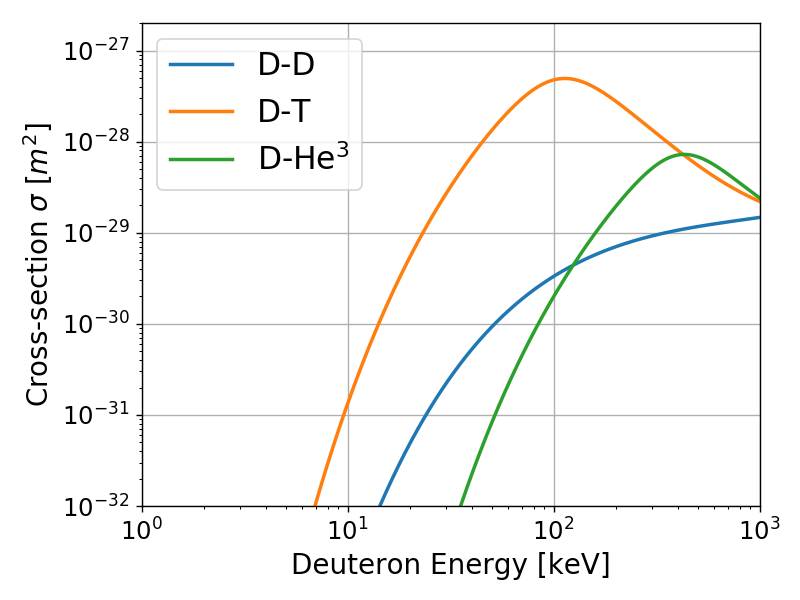

In [30]:
figure(num=2)
loglog(E, sigma_DD, E, sigma_DT, E, sigma_DHe3, lw=2)
grid()
xlabel('Deuteron Energy [keV]', fontsize=16)
ylabel('Cross-section $\sigma$ [$m^2$]', fontsize=16)
legend(('D-D', 'D-T', 'D-He$^3$'), loc='best', fontsize=18)
ylim([1e-32, 2e-27])
xlim(min(E), max(E))
xticks(fontsize=14)
yticks(fontsize=14)
tight_layout()
savefig('Fusion_cross-section.png', dpi=150)